In [ ]:
import numpy as np
import xarray as xr
import xrft
import matplotlib.pyplot as plt
from pyspec import spectrum as spec


<xarray.DataArray (y: 50, x: 100)>
array([[ 9.5       ,  9.3554915 ,  9.2809262 , ..., 10.8745085 ,
        11.0645653 , 11.19677273],
       [ 9.70773577,  9.56322727,  9.48866197, ..., 11.08224427,
        11.27230107, 11.4045085 ],
       [ 9.9245085 ,  9.78      ,  9.7054347 , ..., 11.29901699,
        11.4890738 , 11.62128123],
       ...,
       [10.3745085 , 10.23      , 10.1554347 , ..., 11.74901699,
        11.9390738 , 12.07128123],
       [10.5645653 , 10.42005681, 10.3454915 , ..., 11.9390738 ,
        12.12913061, 12.26133803],
       [10.69677273, 10.55226423, 10.47769893, ..., 12.07128123,
        12.26133803, 12.39354546]])
Coordinates:
    xkm      (y, x) int64 0 1 2 3 4 5 6 7 8 ... 141 142 143 144 145 146 147 148
    ykm      (y, x) int64 100 101 102 103 104 105 ... 145 146 147 148 149 150
Dimensions without coordinates: y, x

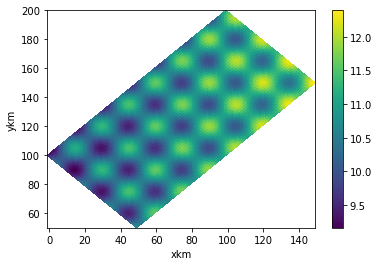

In [24]:
xkm = np.vstack([np.arange(100)+i for i in np.arange(50)])
ykm = np.vstack([np.arange(100,200)-i for i in np.arange(50)])

lx,ly = 30,30
z = np.cos(2*np.pi*xkm/lx)*np.cos(2*np.pi*ykm/ly)+1e-2*xkm+10
z = xr.DataArray(z,dims=('y','x'),coords={'xkm':(('y','x'),xkm),'ykm':(('y','x'),ykm)})

z.plot(x='xkm',y='ykm')
z

In [18]:
#trying to run as it is
xrft.dft(z,dim=['x','y'], detrend='linear', window=True)

/opt/anaconda3/lib/python3.8/site-packages/xrft/xrft.py:250: FutureWarning: This function has been renamed and will disappear in the future. Please use `fft` instead
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/xrft/xrft.py:338: FutureWarning: Flags true_phase and true_amplitude will be set to True in future versions of xrft.dft to preserve the theoretical phasing and amplitude of Fourier Transform. Consider using xrft.fft to ensure future compatibility with numpy.fft like behavior and to deactivate this warning.
  warnings.warn(msg, FutureWarning)


ValueError: The input array contains coordinate variable(s) (['xkm', 'ykm']) whose dims include the transform dimension(s) `x`. Please drop these coordinates (`.drop(['xkm', 'ykm']`) before invoking xrft.

In [25]:
ang = np.arctan2(z.ykm-z.ykm.min(),z.xkm-z.xkm.min()).mean()
X = np.exp(-1j*ang)*(z.xkm-z.xkm.mean() + 1j*(z.ykm-z.ykm.mean()))



<xarray.DataArray (y: 50, x: 100)>
array([[ 9.5       ,  9.3554915 ,  9.2809262 , ..., 10.8745085 ,
        11.0645653 , 11.19677273],
       [ 9.70773577,  9.56322727,  9.48866197, ..., 11.08224427,
        11.27230107, 11.4045085 ],
       [ 9.9245085 ,  9.78      ,  9.7054347 , ..., 11.29901699,
        11.4890738 , 11.62128123],
       ...,
       [10.3745085 , 10.23      , 10.1554347 , ..., 11.74901699,
        11.9390738 , 12.07128123],
       [10.5645653 , 10.42005681, 10.3454915 , ..., 11.9390738 ,
        12.12913061, 12.26133803],
       [10.69677273, 10.55226423, 10.47769893, ..., 12.07128123,
        12.26133803, 12.39354546]])
Coordinates:
  * x        (x) float64 -99.0 -97.0 -95.0 -93.0 -91.0 ... 93.0 95.0 97.0 99.0
  * y        (y) float64 49.0 47.0 45.0 43.0 41.0 ... -43.0 -45.0 -47.0 -49.0

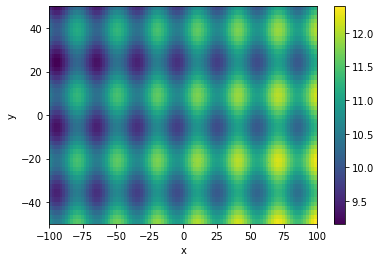

In [26]:
x,y = X.real.mean('y'),X.imag.mean('x')

# z = z.assign_coords(x=x,y=y).drop(['xkm','ykm'])


z = z.assign_coords(x=x/np.cos(ang),y=y/np.sin(ang)).drop(['xkm','ykm'])
z.plot()
z

In [8]:
z

<xarray.DataArray (y: 50, x: 100)>
array([[ 9.5       ,  9.3554915 ,  9.2809262 , ..., 10.8745085 ,
        11.0645653 , 11.19677273],
       [ 9.70773577,  9.56322727,  9.48866197, ..., 11.08224427,
        11.27230107, 11.4045085 ],
       [ 9.9245085 ,  9.78      ,  9.7054347 , ..., 11.29901699,
        11.4890738 , 11.62128123],
       ...,
       [10.3745085 , 10.23      , 10.1554347 , ..., 11.74901699,
        11.9390738 , 12.07128123],
       [10.5645653 , 10.42005681, 10.3454915 , ..., 11.9390738 ,
        12.12913061, 12.26133803],
       [10.69677273, 10.55226423, 10.47769893, ..., 12.07128123,
        12.26133803, 12.39354546]])
Coordinates:
  * x        (x) float64 -70.0 -68.59 -67.18 -65.76 ... 65.76 67.18 68.59 70.0
  * y        (y) float64 34.65 33.23 31.82 30.41 ... -30.41 -31.82 -33.23 -34.65

/opt/anaconda3/lib/python3.8/site-packages/xrft/xrft.py:49: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


[(0.0, 0.1)]

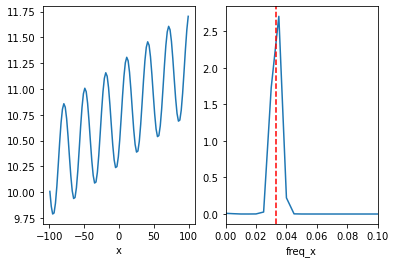

In [6]:
fig,ax = plt.subplots(1,2)

z.mean('y').plot(ax=ax[0])

(
    np.abs(
        xrft.power_spectrum(
            z.mean('y'),dim=['x'],
            detrend='linear',window=True
            )
        )
).plot(ax=ax[1])

ax[1].axvline(1/lx,color='r',linestyle='--')
ax[1].set(
    xlim=[0,0.1]
)

/opt/anaconda3/lib/python3.8/site-packages/xrft/xrft.py:49: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


[(-0.2, 0.2), (-0.2, 0.2)]

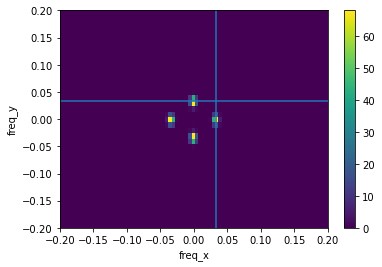

In [7]:
P = xrft.power_spectrum(z,dim=['x','y'], detrend='linear',window=True)


fig,ax = plt.subplots()
np.abs(P).plot(ax=ax)
ax.axvline(1/lx)
ax.axhline(1/ly)

ax.set(
    xlim=[-0.2,0.2],
    ylim=[-0.2,0.2],
)

/opt/anaconda3/lib/python3.8/site-packages/xrft/xrft.py:1063: Warning: This function has been renamed and will disappear in the future. Please use isotropic_power_spectrum instead
  warnings.warn(msg, Warning)
/opt/anaconda3/lib/python3.8/site-packages/xrft/xrft.py:1041: FutureWarning: The flag `truncate` will be set to True by default in future version in order to truncate the isotropic wavenumber larger than the Nyquist wavenumber.
  warnings.warn(msg, FutureWarning)


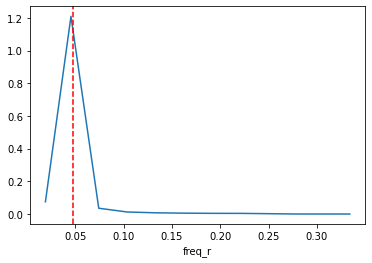

In [8]:
liso = np.sqrt((1/lx)**2+(1/ly)**2)

Piso = xrft.isotropic_powerspectrum(z,dim=['x','y'], detrend='linear')
fig,ax = plt.subplots()
Piso.plot()
ax.axvline(liso,color='r',linestyle='--')